# Temperature scale

**Goal:** I want to understand how to set the Softmax temperature!

- They had said warm-up was crucial for getting a good


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

**Rings**

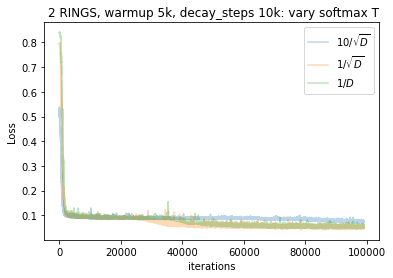

In [2]:
alpha=.3
for cid,l in zip(['2rings-LHT','2rings-sqrtD','2rings-muP-D'],
                 ['$10/\sqrt{D}$','$1/\sqrt{D}$','$1/D$']):
    try:
        with open(f'code/models/{cid}/loss.json') as f:
            ld = json.load(f)
        plt.plot(ld,label=l,alpha=alpha)

    except FileNotFoundError:
        print(f'cid {cid} doesn\'t exist yet')
        
        
plt.title(f'2 RINGS, warmup 5k, decay_steps 10k: vary softmax T',loc='right')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.legend()
# plt.xlim(0,4000)

I wonder if this dependence changes when we increase the query dim?


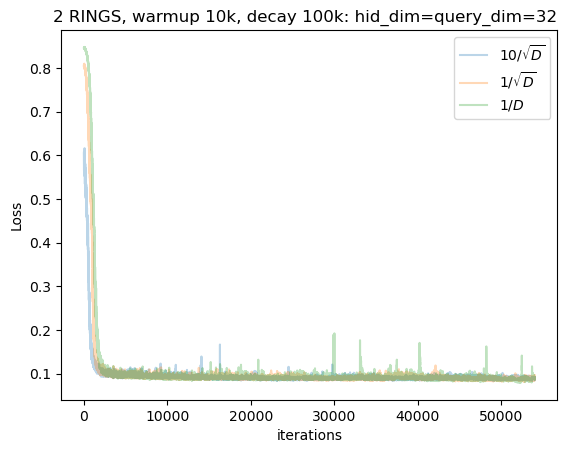

In [3]:
alpha=.3
for cid,l in zip(['2rings-LHT','2rings-sqrtD','2rings-muP-D'],
                 ['$10/\sqrt{D}$','$1/\sqrt{D}$','$1/D$']):
    try:
        with open(f'code/models/{cid}-long/loss.json') as f:
            ld = json.load(f)
        plt.plot(ld,label=l,alpha=alpha)

    except FileNotFoundError:
        print(f'cid {cid}-long doesn\'t exist yet')
        
        
plt.title(f'2 RINGS, warmup 10k, decay 100k: hid_dim=query_dim=32',loc='right')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.legend()

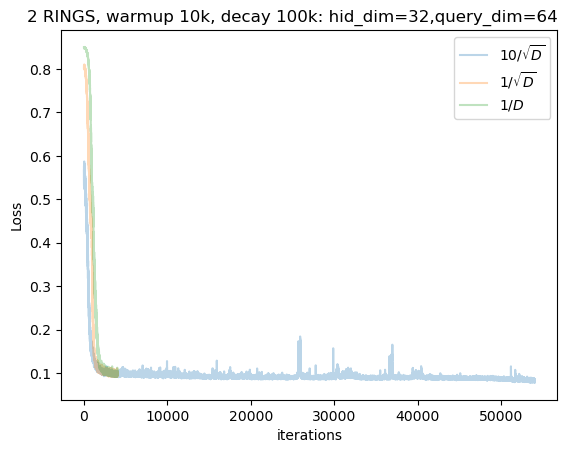

In [4]:
alpha=.3
for cid,l in zip(['2rings-LHT','2rings-sqrtD','2rings-muP-D'],
                 ['$10/\sqrt{D}$','$1/\sqrt{D}$','$1/D$']):
    try:
        with open(f'code/models/{cid}-big/loss.json') as f:
            ld = json.load(f)
        plt.plot(ld,label=l,alpha=alpha)

    except FileNotFoundError:
        print(f'cid {cid}-big doesn\'t exist yet')
        
        
plt.title(f'2 RINGS, warmup 10k, decay 100k: hid_dim=32,query_dim=64',loc='right')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.legend()

In [11]:
# %%bash
# ls code/models/2rings-muP-D-big/loss.json

code/models/2rings-sqrtD/loss.json
45001
code/models/2rings-sqrtD-long/loss.json
54001
code/models/2rings-sqrtD-big/loss.json
4001


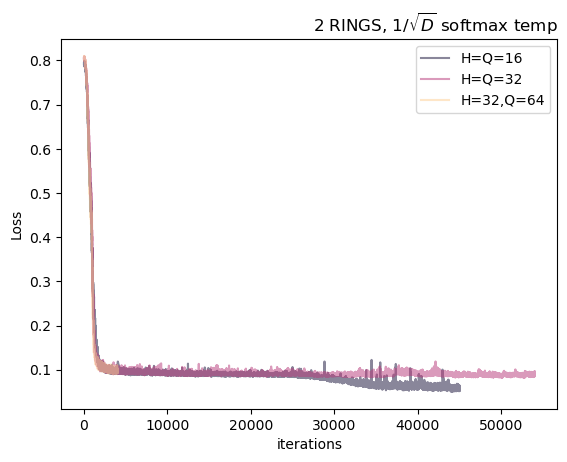

code/models/2rings-muP-D/loss.json
46001
code/models/2rings-muP-D-long/loss.json
54001
code/models/2rings-muP-D-big/loss.json
4001


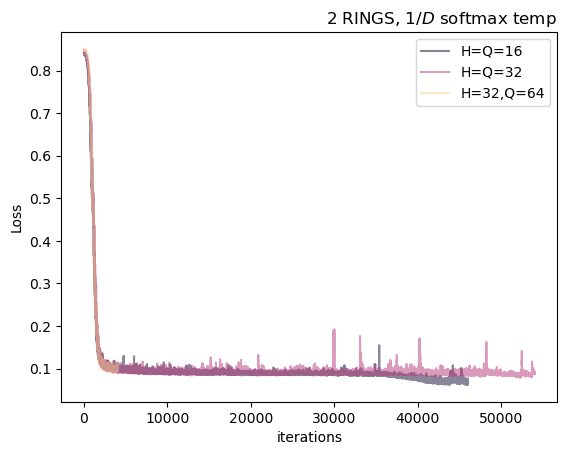

In [8]:
alpha=.5

import matplotlib as mlp
cmap = mlp.colormaps.get_cmap('magma')

for base, title in zip(['LHT','sqrtD','muP-D'],
                       ['$10/\sqrt{D}$','$1/\sqrt{D}$','$1/D$']):

    if base=='LHT': continue
    for tag,l,i in zip(['','-long','-big'],
                       ['H=Q=16','H=Q=32','H=32,Q=64'],
                       [.1,.5,.9]):
        color = cmap(i)
        fname = f'code/models/2rings-{base}{tag}/loss.json'
        print(fname)
        try:
            with open(fname) as f:
                ld = json.load(f)
            print(len(ld))
            plt.plot(ld,label=l,alpha=alpha,color=color)

        except FileNotFoundError:
            print(f'^ this file doesn\'t exist yet')

    plt.title(f'2 RINGS, {title} softmax temp',loc='right')
    plt.xlabel('iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Hypotehsis:
1. It could be that the smaller models are just converging better
    - It could be the feature fo the "faster" optimizer schedule that I was using for H=Q=16 though 
2. Maybe the _bigger models_ just take longer to converge?

**Goal:** Retrain some of these models with a "warm-start"

Based on looking at some individual examples, it seems like the $\sqrt{D}$ temperature with H=Q=16 training is doing _the best_, so I'll start resubmitting the smaller models for this one?
